In [92]:
import folium
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
from datetime import timedelta
# Mapping
import geopandas
import geopy
from geopy.geocoders import Nominatim
import folium
from geopy.extra.rate_limiter import RateLimiter
from folium import plugins
from folium.plugins import MarkerCluster
# Statistical OLS Regression Analysis
%matplotlib inline
import statsmodels.api as sm
from statsmodels.compat import lzip
from statsmodels.formula.api import ols

df = pd.read_csv('/Users/rupaliwadhawan/Downloads/AI_locations.csv')
toronto_map = folium.Map(location=[43.70, -79.42], zoom_start=12)


In [93]:
heat_data = [[row['LAT_WGS84'], row['LONG_WGS84']] for index, row in df.iterrows()]
from folium.plugins import HeatMap
HeatMap(heat_data).add_to(toronto_map)
toronto_map.save('crime_heatmap_1.html')

In [94]:
from folium.plugins import HeatMap
HeatMap(heat_data).add_to(toronto_map)
toronto_map.save('crime_heatmap_1.html')

In [95]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#Find centroids
lat = []
long = []
for index, row in incidents_on_nov09.iterrows():
  lat.append(row["latitude"])
  long.append(row["longitude"])
lat1=sum(lat)/len(lat)
lat2=sum(long)/len(long)
folium.CircleMarker([lat1,lat2],
                        radius=5,
                        popup="CENTER LOCATION",
                        color='black',
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m2)
m2

In [96]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,OCC_TIME_RANGE,DIVISION,DEATH,INJURIES,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.234955,43.781528,1,GO-2004397105,2004/05/15 04:00:00+00,2004,May,Saturday,136,15,...,Night,D41,0,0,142,Woburn North,137,Woburn (137),-79.234955,43.781528
1,-79.618218,43.733547,2,GO-2004600109,2004/07/26 04:00:00+00,2004,July,Monday,208,26,...,Evening,D23,0,0,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547
2,-79.518759,43.769157,3,GO-2004311851,2004/05/14 04:00:00+00,2004,May,Friday,135,14,...,Afternoon,D31,1,1,24,Black Creek,24,Black Creek (24),-79.518759,43.769157
3,-79.378870,43.660665,4,GO-2004736004,2004/12/19 05:00:00+00,2004,December,Sunday,354,19,...,Night,D51,1,0,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665
4,-79.212435,43.812075,5,GO-2004303455,2004/04/12 04:00:00+00,2004,April,Monday,103,12,...,Evening,D42,0,0,146,Malvern East,132,Malvern (132),-79.212435,43.812075


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [98]:
from datetime import timedelta

In [99]:
# Convert time objects
df['OCC_DATE'] = pd.to_datetime(df['OCC_DATE'])
df['date'] = [d.date() for d in df['OCC_DATE']]
df['time'] = [d.time() for d in df['OCC_DATE']]
df['day'] = df['OCC_DATE'].dt.day_name()
# Find Fractions of Day
df['timeint'] = (df['OCC_DATE']-df['OCC_DATE'].dt.normalize()).dt.total_seconds()/timedelta(days=1).total_seconds()

In [100]:
df.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOW,OCC_DOY,OCC_DAY,...,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,date,time,day,timeint
0,-79.234955,43.781528,1,GO-2004397105,2004-05-15 04:00:00+00:00,2004,May,Saturday,136,15,...,142,Woburn North,137,Woburn (137),-79.234955,43.781528,2004-05-15,04:00:00,Saturday,0.166667
1,-79.618218,43.733547,2,GO-2004600109,2004-07-26 04:00:00+00:00,2004,July,Monday,208,26,...,1,West Humber-Clairville,1,West Humber-Clairville (1),-79.618218,43.733547,2004-07-26,04:00:00,Monday,0.166667
2,-79.518759,43.769157,3,GO-2004311851,2004-05-14 04:00:00+00:00,2004,May,Friday,135,14,...,24,Black Creek,24,Black Creek (24),-79.518759,43.769157,2004-05-14,04:00:00,Friday,0.166667
3,-79.378870,43.660665,4,GO-2004736004,2004-12-19 05:00:00+00:00,2004,December,Sunday,354,19,...,168,Downtown Yonge East,75,Church-Yonge Corridor (75),-79.378870,43.660665,2004-12-19,05:00:00,Sunday,0.208333
4,-79.212435,43.812075,5,GO-2004303455,2004-04-12 04:00:00+00:00,2004,April,Monday,103,12,...,146,Malvern East,132,Malvern (132),-79.212435,43.812075,2004-04-12,04:00:00,Monday,0.166667


In [101]:
import warnings
warnings.filterwarnings("ignore", message="A column-vector y was passed when a 1d array was expected")

In [102]:
from sklearn.preprocessing import MinMaxScaler


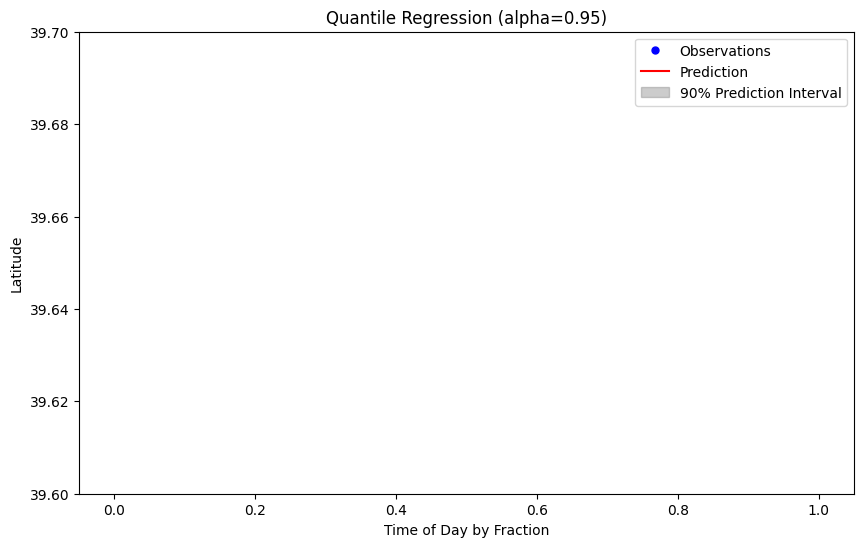

In [110]:
scaler = MinMaxScaler()
df['timeint'] = scaler.fit_transform(df[['timeint']])

# Extract the feature (X) and target variable (y) from the DataFrame
X = np.atleast_2d(df['timeint'].values).T
y = df['Y'].values

alpha = 0.95

# Create and fit the GradientBoostingRegressor model
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=100, max_depth=3,
                                learning_rate=0.1, min_samples_leaf=9,
                                min_samples_split=9)

# Fit the model
clf.fit(X, y)

# Generate 'xx' using the same range as 'X'
xx = np.linspace(df['timeint'].min(), df['timeint'].max(), len(X)).reshape(-1, 1)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

# Compute the prediction intervals
clf.set_params(alpha=1.0 - alpha)
y_upper = clf.predict(xx)

clf.set_params(loss='squared_error')
clf.fit(X, y)
y_lower = clf.predict(xx)

# Plot the function, the prediction, and the prediction intervals
plt.figure(figsize=(10, 6))
plt.plot(df['timeint'], df['Y'], 'b.', markersize=10, label='Observations')
plt.plot(xx, y_pred, 'r-', label='Prediction')
plt.fill_between(xx.ravel(), y_lower, y_upper, color='gray', alpha=0.4, label='90% Prediction Interval')
plt.xlabel('Time of Day by Fraction')
plt.ylabel('Latitude')
plt.ylim(39.6, 39.7)
plt.legend(loc='upper right')
plt.title(f'Quantile Regression (alpha={alpha})')
plt.show()


y_pred: [43.79816941 43.79816941 43.79816941 43.79816941 43.79816941 43.79816941
 43.79816941 43.79816941 43.79816941 43.79816941]
y_lower: [43.15822943 43.15822943 43.15822943 43.15822943 43.15822943 43.15822943
 43.15822943 43.15822943 43.15822943 43.15822943]
y_upper: [43.79816941 43.79816941 43.79816941 43.79816941 43.79816941 43.79816941
 43.79816941 43.79816941 43.79816941 43.79816941]


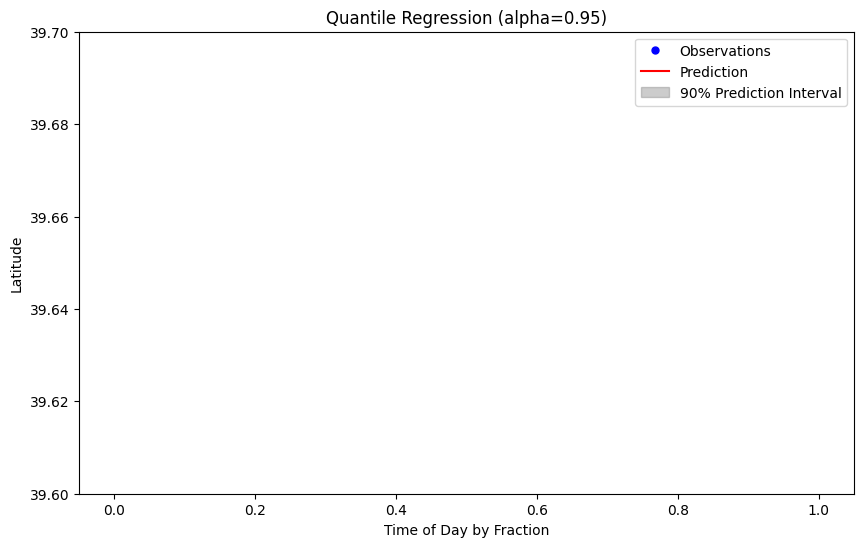

In [111]:
# Normalize the 'timeint' feature to a broader range (0 to 1)
scaler = MinMaxScaler()
df['timeint'] = scaler.fit_transform(df[['timeint']])

# Extract the feature (X) and target variable (y) from the DataFrame
X = np.atleast_2d(df['timeint'].values).T
y = df['Y'].values

# Mesh the input space for evaluations of the real function, the prediction, and its MSE
xx = np.atleast_2d(np.linspace(0, 1, 1000)).T
xx = xx.astype(np.float32)

alpha = 0.95

# Create and fit the GradientBoostingRegressor model
clf = GradientBoostingRegressor(loss='quantile', alpha=alpha,
                                n_estimators=100, max_depth=3,
                                learning_rate=0.1, min_samples_leaf=9,
                                min_samples_split=9)

# Fit the model
clf.fit(X, y)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

# Compute the prediction intervals
clf.set_params(alpha=1.0 - alpha)
y_upper = clf.predict(xx)

clf.set_params(loss='squared_error')
clf.fit(X, y)
y_lower = clf.predict(xx)

# Print the first few values of y_pred, y_lower, and y_upper
print("y_pred:", y_pred[:10])
print("y_lower:", y_lower[:10])
print("y_upper:", y_upper[:10])

# Plot the function, the prediction, and the prediction intervals
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'b.', markersize=10, label='Observations')
plt.plot(xx, y_pred, 'r-', label='Prediction')
plt.fill_between(xx.ravel(), y_lower, y_upper, color='gray', alpha=0.4, label='90% Prediction Interval')
plt.xlabel('Time of Day by Fraction')
plt.ylabel('Latitude')
plt.ylim(39.6, 39.7)
plt.legend(loc='upper right')
plt.title(f'Quantile Regression (alpha={alpha})')
plt.show()

<Figure size 640x480 with 0 Axes>

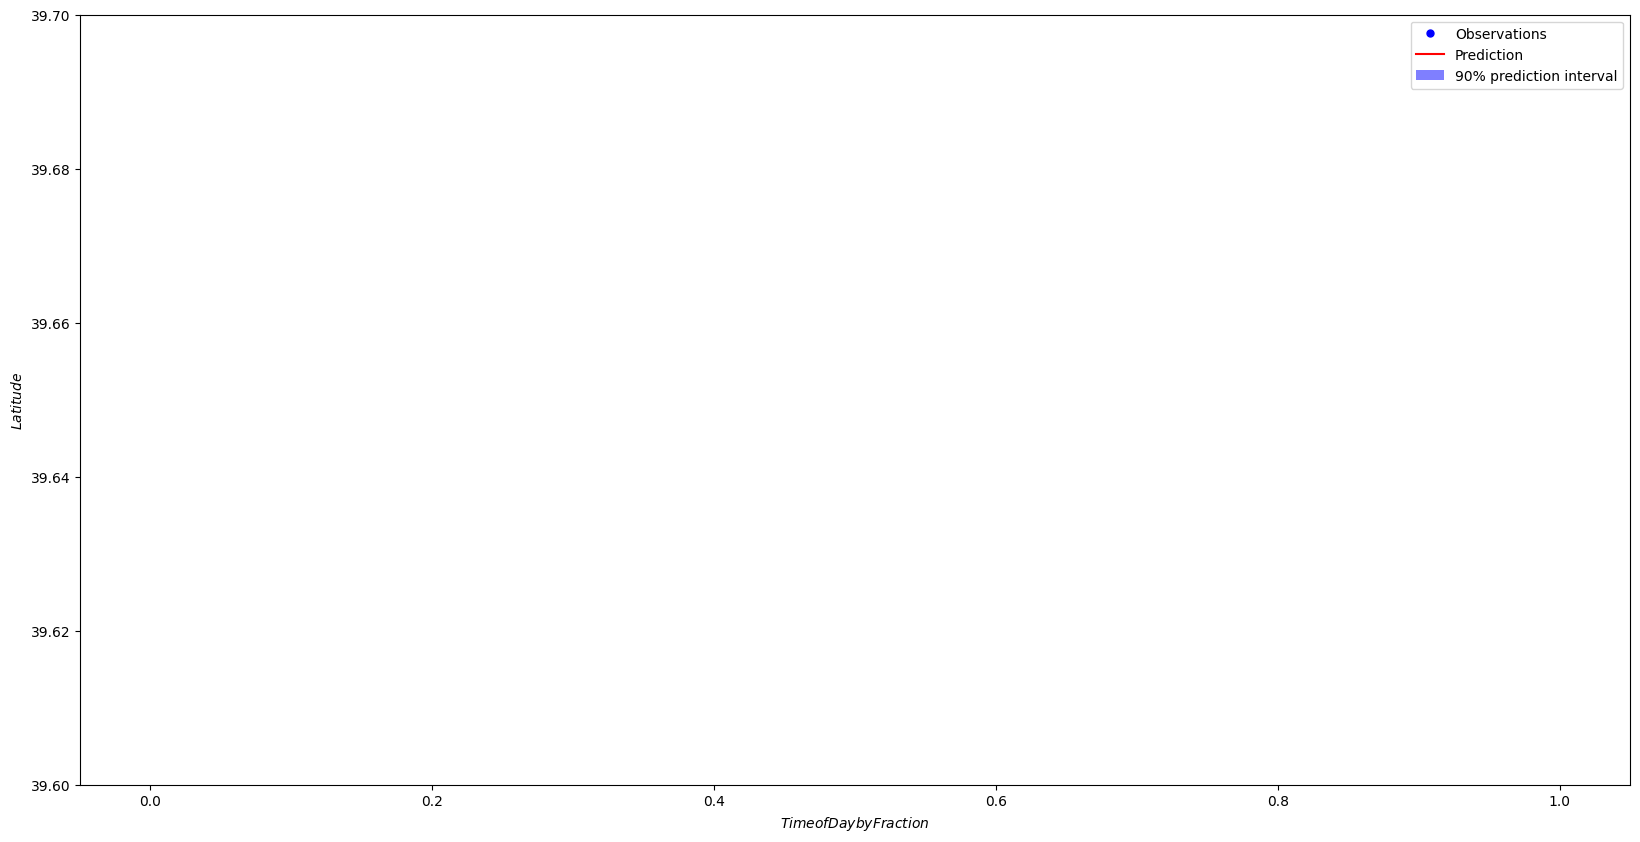

In [112]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.plot(df['timeint'], df['Y'], 'b.', markersize=10, label='Observations')
plt.plot(xx, y_pred, 'r-', label=u'Prediction')
plt.plot(xx, y_upper, 'k-')
plt.plot(xx, y_lower, 'k-')
plt.fill(np.concatenate([xx, xx[::-1]]),
         np.concatenate([y_upper, y_lower[::-1]]),
         alpha=.5, fc='b', ec='None', label='90% prediction interval')
plt.xlabel('$Time of Day by Fraction$')
plt.ylabel('$Latitude$')
plt.ylim(39.6, 39.7)
plt.legend(loc='upper right')
plt.show()
ypred2 = y_pred

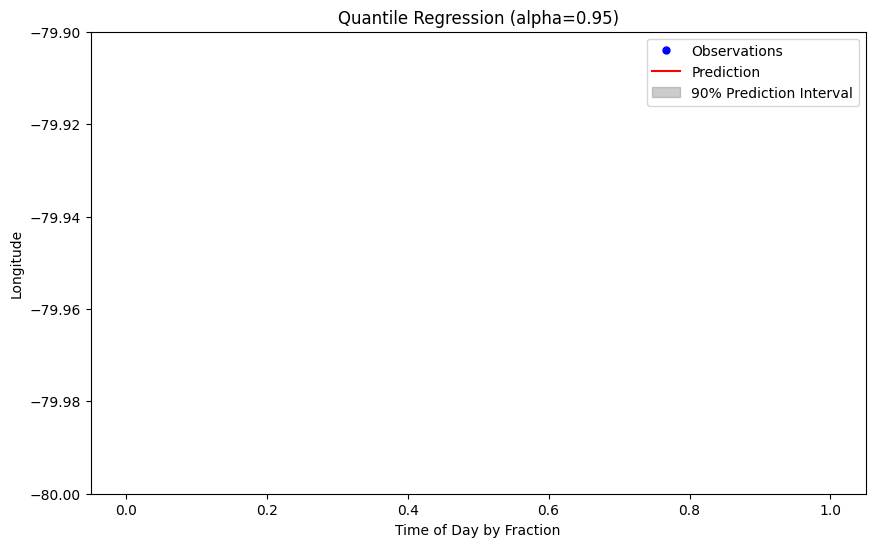

In [114]:
scaler = MinMaxScaler()
df['timeint'] = scaler.fit_transform(df[['timeint']])

# Extract the feature (X) and target variable (y) from the DataFrame
X = np.atleast_2d(df['timeint'].values).T
y = df['LONG_WGS84'].values

alpha = 0.95

clf = GradientBoostingRegressor(loss='quantile',  # Try 'ls' for least squares or 'lad' for least absolute deviation
                                n_estimators=1000,  # Increase the number of estimators
                                max_depth=5,  # Increase the depth of the trees
                                learning_rate=0.01)

# Fit the model
clf.fit(X, y)

# Generate 'xx' using the same range as 'X'
xx = np.linspace(df['timeint'].min(), df['timeint'].max(), len(X)).reshape(-1, 1)

# Make the prediction on the meshed x-axis
y_pred = clf.predict(xx)

# Compute the prediction intervals
clf.set_params(alpha=1.0 - alpha)
y_upper = clf.predict(xx)

clf.set_params(loss='squared_error')
clf.fit(X, y)
y_lower = clf.predict(xx)

# Plot the function, the prediction, and the prediction intervals
plt.figure(figsize=(10, 6))
plt.plot(df['timeint'], df['LONG_WGS84'], 'b.', markersize=10, label='Observations')
plt.plot(xx, y_pred, 'r-', label='Prediction')
plt.fill_between(xx.ravel(), y_lower, y_upper, color='gray', alpha=0.4, label='90% Prediction Interval')
plt.xlabel('Time of Day by Fraction')
plt.ylabel('Longitude')
plt.ylim(-80, -79.9)
plt.legend(loc='upper right')
plt.title(f'Quantile Regression (alpha={alpha})')
plt.show()
y_pred1=y_pred

In [116]:
m5 = folium.Map([39.645,-79.96], zoom_start=14)
for i in range(len(y_pred1)):
    folium.CircleMarker([ypred2[i], y_pred1[i]],
                        radius=4,
                        popup=str(i),
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m5)
m5

IndexError: index 1000 is out of bounds for axis 0 with size 1000